### Notebook to summarize HAC clustering results from larger holdout data
Make plot to summarize the result visuallu and compare different experiemnt configurations

In [1]:
%matplotlib inline
import os
import gc
import glob
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.metrics import adjusted_mutual_info_score as AMI
from sklearn.metrics import normalized_mutual_info_score as NMI
from sklearn.metrics import adjusted_rand_score as ARS
from sklearn.metrics import completeness_score as CLS

In [2]:
def pkl_loader(filename):
    with open(filename, 'rb') as f:
        data = pickle.load(f)
    return data

In [3]:
def file_getter(basedatadir=None, expname=None, nclusters=None, cexpname=None,score_only=True):
    """ TODO in future specify clustering expname"""
    datadir = os.path.join(basedatadir, f"{expname}/nclusters-{nclusters}/HAC")
    try:
        tmp = glob.glob(os.path.join(datadir, f'*{cexpname}.pkl'))
        a = [i for i in tmp]
        print("Begin loading result files")
    except Exception as e:
        print(e)
        
    scores =  pkl_loader(
            glob.glob(os.path.join(datadir, f"score-hac_{cexpname}.pkl"))[0]
    )
    if not score_only:
        omodel =  pkl_loader(
            glob.glob(os.path.join(datadir, f"original-hac_{cexpname}.pkl"))[0]
        )
        rmodel =  pkl_loader(
            glob.glob(os.path.join(datadir, f"reprot-hac_{cexpname}.pkl"))[0]
        )
        return scores, omodel, rmodel
    else:
        return scores

In [4]:
def extract_metric_fn(expname=None, cexpname_list=[], nclusters_list=[], metric=None ):
    scores = []
    for cexpname, nclusters in zip(cexpname_list, nclusters_list):
        tmp_score = file_getter(basedatadir=basedatadir, expname=expname, cexpname=str(cexpname),
                          nclusters=nclusters, score_only=True)
        scores.append(tmp_score[f'nclusters-{nclusters}'][metric])
    return scores

#### Large1-1
Initial setting. For 2000 patches, rotate and copy every N degrees and clustering. Compare clustering labels assumed first and the rotataion with copied patches are 0, and then up to 1999.

In [8]:
basedatadir = './large_hac1'

In [5]:
cexpnames_list = [4586180,4586181,4586182,4585694,4586183,
                  4585692,4586184,4586185,4583334,4586186,4586179,4583049]
nclusters_list = [2,4,8,10,16,20,32,64,100,128,256,2000]

In [9]:
amiRIs = extract_metric_fn(expname='67011582',metric='ami', 
                        cexpname_list=cexpnames_list, nclusters_list=nclusters_list)

Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files


In [11]:
clsRIs = extract_metric_fn(expname='67011582',metric='cls', 
                        cexpname_list=cexpnames_list, nclusters_list=nclusters_list)

Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files


In [12]:
cexpnames_list = [4586634,4586635,4586636,4586637,4586638,4586639,4583475,4586640,4586630,4583443]
nclusters_list = [2,4,8,16,32,64,100,128,256,2000]

In [13]:
amiNRIs = extract_metric_fn(expname='m2_02_global_2000_2018_band28_29_31',metric='ami', 
                        cexpname_list=cexpnames_list, nclusters_list=nclusters_list)

Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files


In [14]:
clsNRIs = extract_metric_fn(expname='m2_02_global_2000_2018_band28_29_31',metric='cls', 
                        cexpname_list=cexpnames_list, nclusters_list=nclusters_list)

Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files


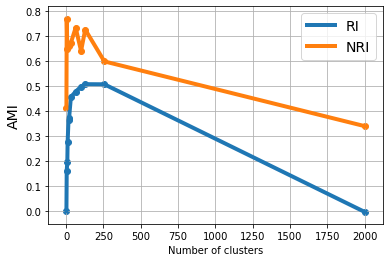

In [17]:
fig = plt.figure(figsize=(6,4))
labels = ['RI', 'NRI']
metric = 'AMI'

for idx, (ilist,nclusters_list )in enumerate(zip([amiRIs, amiNRIs],[
    [2,4,8,10,16,20,32,64,100,128,256,2000],
    [2,4,8,16,32,64,100,128,256,2000]
    ] ) ):
    plt.plot(nclusters_list, ilist, color=f'C{idx}', linewidth=4, label=labels[idx])
    plt.scatter(nclusters_list, ilist, color=f'C{idx}')
    plt.ylabel(f'{metric}', fontsize=14)
    plt.xlabel('Number of clusters')
plt.grid(True)
plt.legend(fontsize=14)
plt.show()
plt.close()

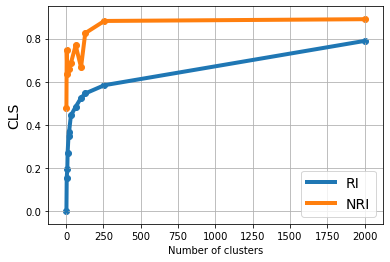

In [18]:
fig = plt.figure(figsize=(6,4))
labels = ['RI', 'NRI']
metric = 'CLS'

for idx, (ilist,nclusters_list )in enumerate(zip([clsRIs, clsNRIs],[
    [2,4,8,10,16,20,32,64,100,128,256,2000],
    [2,4,8,16,32,64,100,128,256,2000]
    ] ) ):
    plt.plot(nclusters_list, ilist, color=f'C{idx}', linewidth=4, label=labels[idx])
    plt.scatter(nclusters_list, ilist, color=f'C{idx}')
    plt.ylabel(f'{metric}', fontsize=14)
    plt.xlabel('Number of clusters')
plt.grid(True)
plt.legend(fontsize=14)
plt.show()
plt.close()

#### Large1-2 debug + change copy size?

In [34]:
cexpnames_list = [4591360, 4591361, 4591362,4591363,4591364, 4591365, 4591366,4591359,4596305,4590898]
nclusters_list =  [2,4,8,16,32,64,128,256,300,674]

In [35]:
amiRIs = extract_metric_fn(expname='67011582',metric='ami', 
                        cexpname_list=cexpnames_list, nclusters_list=nclusters_list)

Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files


In [36]:
clsRIs = extract_metric_fn(expname='67011582',metric='cls', 
                        cexpname_list=cexpnames_list, nclusters_list=nclusters_list)

Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files


In [37]:
cexpnames_list = [4591373,4591429,4591449,4591450,4591451,4591452,4591587,4591372,4596308,4591099 ]
nclusters_list = [2,4,8,16,32,64,128,256,300,674]

In [38]:
amiNRIs = extract_metric_fn(expname='m2_02_global_2000_2018_band28_29_31',metric='ami', 
                        cexpname_list=cexpnames_list, nclusters_list=nclusters_list)

Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files


In [39]:
clsNRIs = extract_metric_fn(expname='m2_02_global_2000_2018_band28_29_31',metric='cls', 
                        cexpname_list=cexpnames_list, nclusters_list=nclusters_list)

Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files


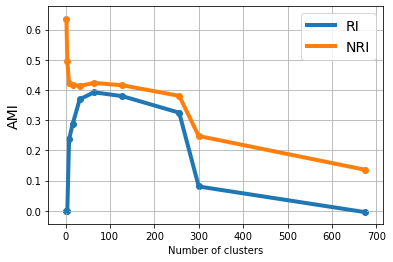

In [32]:
fig = plt.figure(figsize=(6,4))
labels = ['RI', 'NRI']
metric = 'AMI'

for idx, (ilist,nclusters_list )in enumerate(zip([amiRIs, amiNRIs],[
    [2,4,8,16,32,64,128,256,300,674],[2,4,8,16,32,64,128,256,300,674]
    ] ) ):
    plt.plot(nclusters_list, ilist, color=f'C{idx}', linewidth=4, label=labels[idx])
    plt.scatter(nclusters_list, ilist, color=f'C{idx}')
    plt.ylabel(f'{metric}', fontsize=14)
    plt.xlabel('Number of clusters')
plt.grid(True)
plt.legend(fontsize=14)
plt.show()
plt.close()

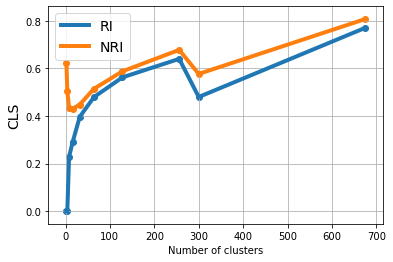

In [40]:
fig = plt.figure(figsize=(6,4))
labels = ['RI', 'NRI']
metric = 'CLS'

for idx, (ilist,nclusters_list )in enumerate(zip([clsRIs, clsNRIs],[
    [2,4,8,16,32,64,128,256,300,674],[2,4,8,16,32,64,128,256,300,674]
    ] ) ):
    plt.plot(nclusters_list, ilist, color=f'C{idx}', linewidth=4, label=labels[idx])
    plt.scatter(nclusters_list, ilist, color=f'C{idx}')
    plt.ylabel(f'{metric}', fontsize=14)
    plt.xlabel('Number of clusters')
plt.grid(True)
plt.legend(fontsize=14)
plt.show()
plt.close()

#### Large2
Large2 implement clustering to copied original data and at second stage rotate them and operate clustering.  
At Large1 , the first one didn't operate clustering to original data

In [43]:
basedatadir = './large_hac2'

In [48]:
cexpnames_list = [4613870,4613871,4613872,4613873,4613874,4613875,4613876,4613869,4612631,4614214,4613243,4614215,4614212 ]
nclusters_list = [2,4,8,16,32,64,128,256,300,600,900,1200,1800]

In [49]:
amiRIs = extract_metric_fn(expname='67011582',metric='ami', 
                        cexpname_list=cexpnames_list, nclusters_list=nclusters_list)

Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files


In [45]:
nmiRIs = extract_metric_fn(expname='67011582',metric='nmi', 
                        cexpname_list=cexpnames_list, nclusters_list=nclusters_list)

Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files


In [55]:
cexpnames_list =  [4613865,4613866,4613867,4614079,4614089,4614097,4614259,4613864,4614416,4614848,4613441,4614864,4614232]
nclusters_list =  [2,4,8,16,32,64,128,256, 300,600,900,1200,1800]

In [56]:
amiNRIs = extract_metric_fn(expname='m2_02_global_2000_2018_band28_29_31',metric='ami', 
                        cexpname_list=cexpnames_list, nclusters_list=nclusters_list)

Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files


In [57]:
nmiNRIs = extract_metric_fn(expname='m2_02_global_2000_2018_band28_29_31',metric='nmi', 
                        cexpname_list=cexpnames_list, nclusters_list=nclusters_list)

Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files


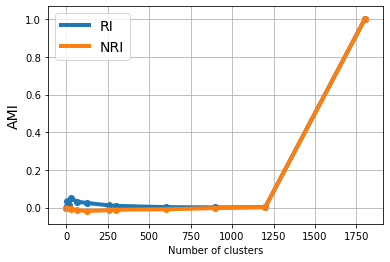

In [58]:
fig = plt.figure(figsize=(6,4))
labels = ['RI', 'NRI']
metric = 'AMI'

for idx, (ilist,nclusters_list )in enumerate(zip([amiRIs, amiNRIs],[
    [2,4,8,16,32,64,128,256, 300,600,900,1200,1800],[2,4,8,16,32,64,128,256, 300,600,900,1200,1800]
    ] ) ):
    plt.plot(nclusters_list, ilist, color=f'C{idx}', linewidth=4, label=labels[idx])
    plt.scatter(nclusters_list, ilist, color=f'C{idx}')
    plt.ylabel(f'{metric}', fontsize=14)
    plt.xlabel('Number of clusters')
plt.grid(True)
plt.legend(fontsize=14)
plt.show()
plt.close()

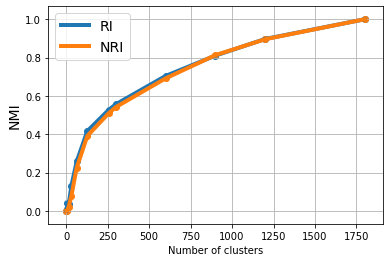

In [59]:
fig = plt.figure(figsize=(6,4))
labels = ['RI', 'NRI']
metric = 'NMI'

for idx, (ilist,nclusters_list )in enumerate(zip([nmiRIs, nmiNRIs],[
    [2,4,8,16,32,64,128,256, 300,600,900,1200,1800],[2,4,8,16,32,64,128,256, 300,600,900,1200,1800]
    ] ) ):
    plt.plot(nclusters_list, ilist, color=f'C{idx}', linewidth=4, label=labels[idx])
    plt.scatter(nclusters_list, ilist, color=f'C{idx}')
    plt.ylabel(f'{metric}', fontsize=14)
    plt.xlabel('Number of clusters')
plt.grid(True)
plt.legend(fontsize=14)
plt.show()
plt.close()

#### Large3
Large2 for selected patches which has clear structures based on statisical preprocessing

In [60]:
basedatadir = './large_hac3'

In [69]:
cexpnames_list = [4620107,4620108,4620109,4619131,4620110,4620106]
nclusters_list = [4,8,16,32,64,128]

In [70]:
amiRIs = extract_metric_fn(expname='67011582',metric='ami', 
                        cexpname_list=cexpnames_list, nclusters_list=nclusters_list)

Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files


In [71]:
nmiRIs = extract_metric_fn(expname='67011582',metric='nmi', 
                        cexpname_list=cexpnames_list, nclusters_list=nclusters_list)

Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files


In [66]:
cexpnames_list = [4620116,4620117,4620126,4619131,4620127,4620115]
nclusters_list = [4,8,16,32,64,128]

In [67]:
amiNRIs = extract_metric_fn(expname='m2_02_global_2000_2018_band28_29_31',metric='ami', 
                        cexpname_list=cexpnames_list, nclusters_list=nclusters_list)

Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files


In [68]:
nmiNRIs = extract_metric_fn(expname='m2_02_global_2000_2018_band28_29_31',metric='nmi', 
                        cexpname_list=cexpnames_list, nclusters_list=nclusters_list)

Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files


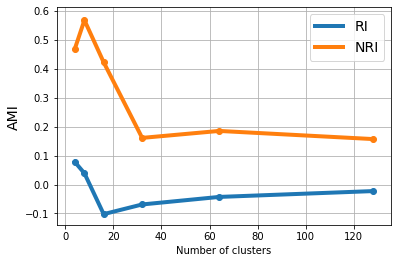

In [72]:
fig = plt.figure(figsize=(6,4))
labels = ['RI', 'NRI']
metric = 'AMI'

for idx, (ilist,nclusters_list )in enumerate(zip([amiRIs, amiNRIs],[
    [4,8,16,32,64,128],[4,8,16,32,64,128]
    ] ) ):
    plt.plot(nclusters_list, ilist, color=f'C{idx}', linewidth=4, label=labels[idx])
    plt.scatter(nclusters_list, ilist, color=f'C{idx}')
    plt.ylabel(f'{metric}', fontsize=14)
    plt.xlabel('Number of clusters')
plt.grid(True)
plt.legend(fontsize=14)
plt.show()
plt.close()

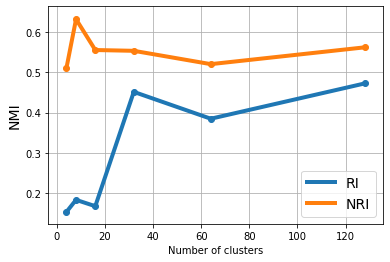

In [73]:
fig = plt.figure(figsize=(6,4))
labels = ['RI', 'NRI']
metric = 'NMI'

for idx, (ilist,nclusters_list )in enumerate(zip([nmiRIs, nmiNRIs],[
    [4,8,16,32,64,128],[4,8,16,32,64,128]
    ] ) ):
    plt.plot(nclusters_list, ilist, color=f'C{idx}', linewidth=4, label=labels[idx])
    plt.scatter(nclusters_list, ilist, color=f'C{idx}')
    plt.ylabel(f'{metric}', fontsize=14)
    plt.xlabel('Number of clusters')
plt.grid(True)
plt.legend(fontsize=14)
plt.show()
plt.close()

#### Large4
Same: Select one patch from "k" clusters and then replicate and rotate these selected patch
Diff: (1) change dataeset from 2-10 to 3-0(stdv over patches is the largest). (2) clustering all 2,000 patches into "k" clusters no matter what patch is less gradation or not

In [77]:
basedatadir = './large_hac4'

In [78]:
cexpnames_list = [4621265,4621265,4621265,4621265,4623254,4622762]
nclusters_list = [12,32,300,600,1200,1800]

In [79]:
amiRIs = extract_metric_fn(expname='67011582',metric='ami', 
                        cexpname_list=cexpnames_list, nclusters_list=nclusters_list)

Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files


In [80]:
nmiRIs = extract_metric_fn(expname='67011582',metric='nmi', 
                        cexpname_list=cexpnames_list, nclusters_list=nclusters_list)

Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files


In [81]:
cexpnames_list = [4621265,4621265,4622158,4622348,4623472]
nclusters_list = [12,32,300,600,1200]

In [82]:
amiNRIs = extract_metric_fn(expname='m2_02_global_2000_2018_band28_29_31',metric='ami', 
                        cexpname_list=cexpnames_list, nclusters_list=nclusters_list)

Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files


In [83]:
nmiNRIs = extract_metric_fn(expname='m2_02_global_2000_2018_band28_29_31',metric='nmi', 
                        cexpname_list=cexpnames_list, nclusters_list=nclusters_list)

Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files


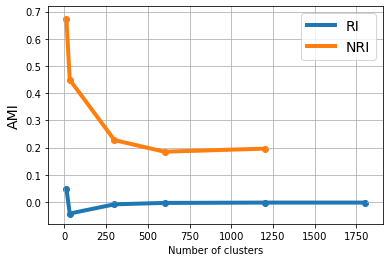

In [84]:
fig = plt.figure(figsize=(6,4))
labels = ['RI', 'NRI']
metric = 'AMI'

for idx, (ilist,nclusters_list )in enumerate(zip([amiRIs, amiNRIs],[
    [12,32,300,600,1200,1800],[12,32,300,600,1200]
    ] ) ):
    plt.plot(nclusters_list, ilist, color=f'C{idx}', linewidth=4, label=labels[idx])
    plt.scatter(nclusters_list, ilist, color=f'C{idx}')
    plt.ylabel(f'{metric}', fontsize=14)
    plt.xlabel('Number of clusters')
plt.grid(True)
plt.legend(fontsize=14)
plt.show()
plt.close()

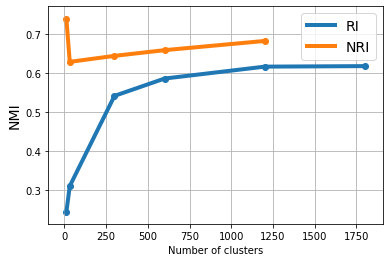

In [85]:
fig = plt.figure(figsize=(6,4))
labels = ['RI', 'NRI']
metric = 'NMI'

for idx, (ilist,nclusters_list )in enumerate(zip([nmiRIs, nmiNRIs],[
    [12,32,300,600,1200,1800],[12,32,300,600,1200]
    ] ) ):
    plt.plot(nclusters_list, ilist, color=f'C{idx}', linewidth=4, label=labels[idx])
    plt.scatter(nclusters_list, ilist, color=f'C{idx}')
    plt.ylabel(f'{metric}', fontsize=14)
    plt.xlabel('Number of clusters')
plt.grid(True)
plt.legend(fontsize=14)
plt.show()
plt.close()

#### Large5
Clustering copy and rotate first with clusteing (1) and then rotate them to next clustering (2) 

In [10]:
basedatadir = './large_hac5'

In [11]:
cexpnames_list = [4643025,4643026,4643024,4642371,4642371,4642371,4642371]
nclusters_list = [8,16,32,64,2000,3000,6000]

In [12]:
amiRIs = extract_metric_fn(expname='67011582',metric='ami', 
                        cexpname_list=cexpnames_list, nclusters_list=nclusters_list)

Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files


In [89]:
nmiRIs = extract_metric_fn(expname='67011582',metric='nmi', 
                        cexpname_list=cexpnames_list, nclusters_list=nclusters_list)

Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files


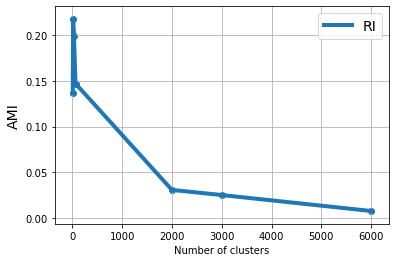

In [90]:
fig = plt.figure(figsize=(6,4))
labels = ['RI', 'NRI']
metric = 'AMI'

for idx, (ilist,nclusters_list )in enumerate(zip([amiRIs],[
    [8,16,32,64,2000,3000,6000]
    ] ) ):
    plt.plot(nclusters_list, ilist, color=f'C{idx}', linewidth=4, label=labels[idx])
    plt.scatter(nclusters_list, ilist, color=f'C{idx}')
    plt.ylabel(f'{metric}', fontsize=14)
    plt.xlabel('Number of clusters')
plt.grid(True)
plt.legend(fontsize=14)
plt.show()
plt.close()

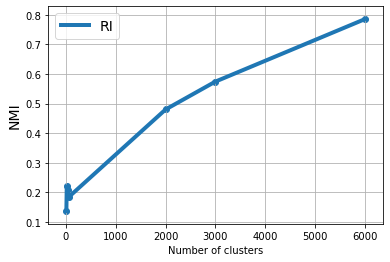

In [91]:
fig = plt.figure(figsize=(6,4))
labels = ['RI', 'NRI']
metric = 'NMI'

for idx, (ilist,nclusters_list )in enumerate(zip([nmiRIs],[
    [8,16,32,64,2000,3000,6000]
    ] ) ):
    plt.plot(nclusters_list, ilist, color=f'C{idx}', linewidth=4, label=labels[idx])
    plt.scatter(nclusters_list, ilist, color=f'C{idx}')
    plt.ylabel(f'{metric}', fontsize=14)
    plt.xlabel('Number of clusters')
plt.grid(True)
plt.legend(fontsize=14)
plt.show()
plt.close()

#### Large6
Select patches which are relatevely better reconstruction even at early stage of trained decoder.  
But approach is same as large1 --> copy ntimes and rotate them. Clustering with original nunber of individual patches (#max==30)

In [13]:
basedatadir = './large_hac6'

In [14]:
nclusters_list = [10,20,30]
cexpnames_list = ["4707356" for i in range(len(nclusters_list))]

In [21]:
amiRIs = extract_metric_fn(expname='67011582',metric='ami', 
                        cexpname_list=cexpnames_list, nclusters_list=nclusters_list)

Begin loading result files
Begin loading result files
Begin loading result files


In [22]:
nmiRIs = extract_metric_fn(expname='67011582',metric='nmi', 
                        cexpname_list=cexpnames_list, nclusters_list=nclusters_list)

Begin loading result files
Begin loading result files
Begin loading result files


In [23]:
amiNRIs = extract_metric_fn(expname='m2_02_global_2000_2018_band28_29_31',metric='ami', 
                        cexpname_list=cexpnames_list, nclusters_list=nclusters_list)

Begin loading result files
Begin loading result files
Begin loading result files


In [24]:
nmiNRIs = extract_metric_fn(expname='m2_02_global_2000_2018_band28_29_31',metric='nmi', 
                        cexpname_list=cexpnames_list, nclusters_list=nclusters_list)

Begin loading result files
Begin loading result files
Begin loading result files


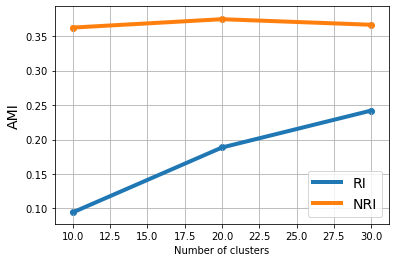

In [25]:
fig = plt.figure(figsize=(6,4))
labels = ['RI', 'NRI']
metric = 'AMI'

for idx, (ilist,nclusters_list )in enumerate(
        zip([amiRIs, amiNRIs],[nclusters_list, nclusters_list] ) ):
    plt.plot(nclusters_list, ilist, color=f'C{idx}', linewidth=4, label=labels[idx])
    plt.scatter(nclusters_list, ilist, color=f'C{idx}')
    plt.ylabel(f'{metric}', fontsize=14)
    plt.xlabel('Number of clusters')
plt.grid(True)
plt.legend(fontsize=14)
plt.show()
plt.close()

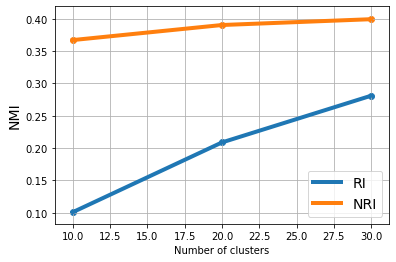

In [26]:
fig = plt.figure(figsize=(6,4))
labels = ['RI', 'NRI']
metric = 'NMI'

for idx, (ilist,nclusters_list )in enumerate(
        zip([nmiRIs, nmiNRIs],[nclusters_list, nclusters_list] ) ):
    plt.plot(nclusters_list, ilist, color=f'C{idx}', linewidth=4, label=labels[idx])
    plt.scatter(nclusters_list, ilist, color=f'C{idx}')
    plt.ylabel(f'{metric}', fontsize=14)
    plt.xlabel('Number of clusters')
plt.grid(True)
plt.legend(fontsize=14)
plt.show()
plt.close()

### Large_hac7
Examine from selected patches: same as large_hac6.  
But, make bunch of rotated copied dataset and compare the clustering assignment across the dataset 

In [36]:
basedatadir = './large_hac7'

In [27]:
def compute_metric(score, metric=None):
    tmp = extract_scores(score, metric=metric)
    result = np.mean(tmp)
    return result

In [28]:
def extract_scores(scores, metric=None):
    slist = []
    for ikey in scores.keys():
        slist.append(scores[ikey][metric])
    return slist

In [51]:
def custom_getter(basedatadir, expname=None, nclusters_list=[], cexpname_list=[], metric='ami'):
    scores_list = []
    for nclusters, cexpname in zip(nclusters_list, cexpname_list):
        score = file_getter(basedatadir=basedatadir,
                        expname=expname, cexpname=cexpname,
                        nclusters=nclusters, score_only=True)
        
   
        scores_list.append(compute_metric(score, metric))    
    return scores_list

In [52]:
nclusters_list = [10,15,20,25,]
cexpname_list = ["4709675" for i in range(len(nclusters_list) )]
amiRIs = custom_getter(basedatadir,expname='67011582', nclusters_list=nclusters_list, 
                       cexpname_list=cexpname_list, metric='ami')

Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files


In [54]:
nclusters_list = [10,15,20,25,]
cexpname_list = ["4709675" for i in range(len(nclusters_list) )]
nmiRIs = custom_getter(basedatadir,expname='67011582', nclusters_list=nclusters_list, 
                       cexpname_list=cexpname_list, metric='nmi')

Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files


In [55]:
nclusters_list = [10,15,20,25,]
cexpname_list = ["4709675" for i in range(len(nclusters_list) )]
amiNRIs = custom_getter(basedatadir,expname='m2_02_global_2000_2018_band28_29_31', 
                       nclusters_list=nclusters_list, 
                       cexpname_list=cexpname_list, metric='ami')

Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files


In [56]:
nclusters_list = [10,15,20,25,]
cexpname_list = ["4709675" for i in range(len(nclusters_list) )]
nmiNRIs = custom_getter(basedatadir,expname='m2_02_global_2000_2018_band28_29_31', 
                       nclusters_list=nclusters_list, 
                       cexpname_list=cexpname_list, metric='nmi')

Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files


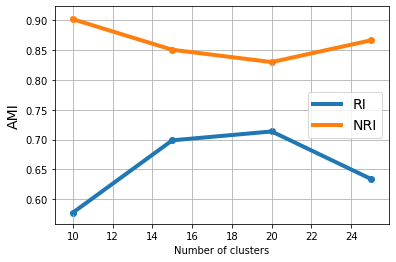

In [57]:
fig = plt.figure(figsize=(6,4))
labels = ['RI', 'NRI']
metric = 'AMI'

for idx, (ilist,nclusters_list )in enumerate(
        zip([amiRIs, amiNRIs],[nclusters_list, nclusters_list] ) ):
    plt.plot(nclusters_list, ilist, color=f'C{idx}', linewidth=4, label=labels[idx])
    plt.scatter(nclusters_list, ilist, color=f'C{idx}')
    plt.ylabel(f'{metric}', fontsize=14)
    plt.xlabel('Number of clusters')
plt.grid(True)
plt.legend(fontsize=14)
plt.show()
plt.close()

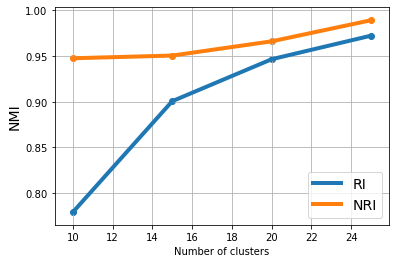

In [58]:
fig = plt.figure(figsize=(6,4))
labels = ['RI', 'NRI']
metric = 'NMI'

for idx, (ilist,nclusters_list )in enumerate(
        zip([nmiRIs, nmiNRIs],[nclusters_list, nclusters_list] ) ):
    plt.plot(nclusters_list, ilist, color=f'C{idx}', linewidth=4, label=labels[idx])
    plt.scatter(nclusters_list, ilist, color=f'C{idx}')
    plt.ylabel(f'{metric}', fontsize=14)
    plt.xlabel('Number of clusters')
plt.grid(True)
plt.legend(fontsize=14)
plt.show()
plt.close()

-----------------
### Large_hac12 and -2
For RI model, extract the `leaky_re_lu_23` layer since the layer shows almost rotate-invariant from the consine similarity perspective. Number of rotation is 12 but for hac12_2, we rotate 6 times to save memory and computation time

##### Number of copies and rotation == 12

In [5]:
basedatadir = './large_hac12'

In [6]:
cexpnames_list = [5085902,5085903,5086011,5086012,5098011,5086121,5086168,5086229,5085901,5081182]
nclusters_list = [4,8,16,32,64,128,256,512,1024,2000]

In [8]:
amiRIs = extract_metric_fn(expname='4678889',metric='ami', 
                        cexpname_list=cexpnames_list, nclusters_list=nclusters_list)

Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files


In [9]:
nmiRIs = extract_metric_fn(expname='4678889',metric='nmi', 
                        cexpname_list=cexpnames_list, nclusters_list=nclusters_list)

Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files


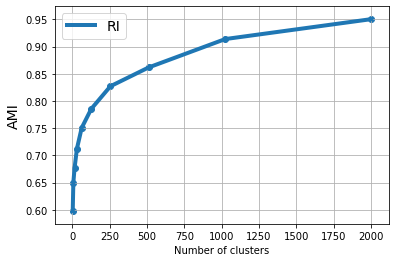

In [10]:
fig = plt.figure(figsize=(6,4))
labels = ['RI', 'NRI']
metric = 'AMI'

for idx, (ilist,nclusters_list )in enumerate(
        zip([amiRIs],[nclusters_list] ) ):
    plt.plot(nclusters_list, ilist, color=f'C{idx}', linewidth=4, label=labels[idx])
    plt.scatter(nclusters_list, ilist, color=f'C{idx}')
    plt.ylabel(f'{metric}', fontsize=14)
    plt.xlabel('Number of clusters')
plt.grid(True)
plt.legend(fontsize=14)
plt.show()
plt.close()

##### Number of copies and rotation == 6

In [7]:
#basedatadir = './large_hac12_2'
basedatadir = './clustering/large_hac12_2'

In [8]:
cexpnames_list = [5098535,5098536,5098537,5098538,5098539,5098540,5098541,5098542,5098534,5098283]
nclusters_list =  [4,8,16,32,64,128,256,512,1024,2000]

In [9]:
amiRIs = extract_metric_fn(expname='4678889',metric='ami', 
                        cexpname_list=cexpnames_list, nclusters_list=nclusters_list)

Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files


In [14]:
nmiRIs = extract_metric_fn(expname='4678889',metric='nmi', 
                        cexpname_list=cexpnames_list, nclusters_list=nclusters_list)

Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files


In [10]:
cexpnames_list = [5109737,5109739,5109740,5112480,5112622,5112625,5113997,5116529,5117581,5098603]

In [11]:
amiNRIs = extract_metric_fn( expname='m2_02_global_2000_2018_band28_29_31',metric='ami', 
                        cexpname_list=cexpnames_list, nclusters_list=nclusters_list)

Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files


In [17]:
nmiNRIs = extract_metric_fn( expname='m2_02_global_2000_2018_band28_29_31',metric='nmi', 
                        cexpname_list=cexpnames_list, nclusters_list=nclusters_list)

Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files


In [12]:
cexpnames_list = [7083964,7083967,7083968,7083974,7083975,7086293,7086296,7086297,7086302,7083963]

In [13]:
amiRAs = extract_metric_fn( expname='64541244',metric='ami', 
                        cexpname_list=cexpnames_list, nclusters_list=nclusters_list)

Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files
Begin loading result files


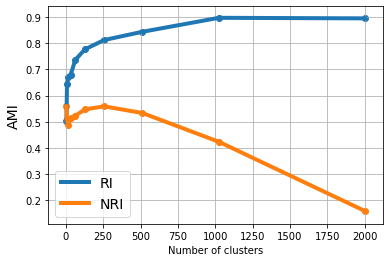

In [18]:
fig = plt.figure(figsize=(6,4))
labels = ['RI', 'NRI']
metric = 'AMI'

for idx, (ilist,nclusters_list )in enumerate(
        zip([amiRIs, amiNRIs],[nclusters_list, nclusters_list] ) ):
    plt.plot(nclusters_list, ilist, color=f'C{idx}', linewidth=4, label=labels[idx])
    plt.scatter(nclusters_list, ilist, color=f'C{idx}')
    plt.ylabel(f'{metric}', fontsize=14)
    plt.xlabel('Number of clusters')
plt.grid(True)
plt.legend(fontsize=14)
plt.show()
plt.close()

#### For paper

In [29]:
fig = plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 20})
labels = ['RI', 'NRI']
metric = 'AMI'

for idx, (ilist,nclusters_list )in enumerate(
        zip([amiRIs, amiNRIs],[nclusters_list, nclusters_list] ) ):
    plt.plot(nclusters_list, ilist, color=f'C{idx}', linewidth=8, label=labels[idx])
    plt.scatter(nclusters_list, ilist, color=f'C{idx}',s=160)
    plt.ylabel(f'{metric}', fontsize=14)
plt.xlabel('Number of clusters', fontsize=20)
plt.ylabel('AMI', fontsize=20)
plt.grid(True)
plt.legend(fontsize=30)
#plt.show()

pdf = PdfPages("multi_cluster.pdf")
plt.savefig(pdf, format='pdf', bbox_inches='tight')
pdf.close()
plt.close()

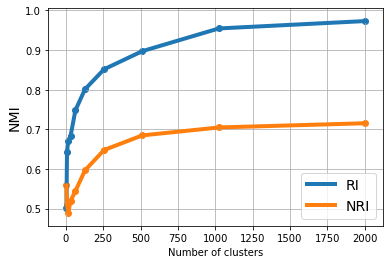

In [19]:
fig = plt.figure(figsize=(6,4))
labels = ['RI', 'NRI']
metric = 'NMI'

for idx, (ilist,nclusters_list )in enumerate(
        zip([nmiRIs, nmiNRIs],[nclusters_list, nclusters_list] ) ):
    plt.plot(nclusters_list, ilist, color=f'C{idx}', linewidth=4, label=labels[idx])
    plt.scatter(nclusters_list, ilist, color=f'C{idx}')
    plt.ylabel(f'{metric}', fontsize=14)
    plt.xlabel('Number of clusters')
plt.grid(True)
plt.legend(fontsize=14)
plt.show()
plt.close()

---------------
### For paper (2020, Dec, 4th)

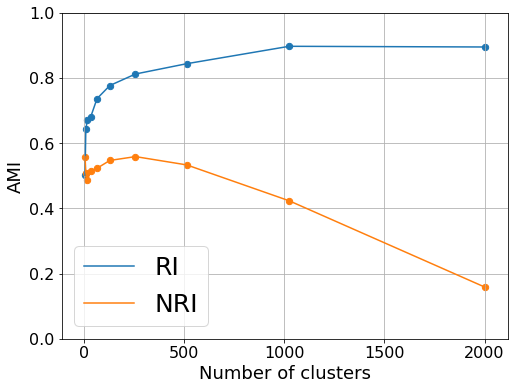

In [27]:
fig = plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 16})
labels = ['RI', 'NRI']
metric = 'AMI'

for idx, (ilist,nclusters_list )in enumerate(
        zip([amiRIs, amiNRIs],[nclusters_list, nclusters_list] ) ):
    plt.plot(nclusters_list, ilist, color=f'C{idx}', linewidth=1.5, label=labels[idx])
    plt.scatter(nclusters_list, ilist, color=f'C{idx}',s=40)
    plt.ylabel(f'{metric}', fontsize=14)
plt.xlabel('Number of clusters', fontsize=18)
plt.ylabel('AMI', fontsize=18)
plt.grid(True)
plt.legend(fontsize=25)
#plt.show()
plt.ylim(0,1)
plt.xticks(np.arange(0,2001,500))

pdf = PdfPages("multi_cluster.pdf")
plt.savefig(pdf, format='pdf', bbox_inches='tight')
pdf.close()
#plt.close()

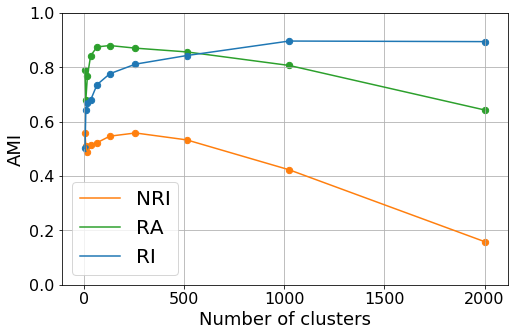

In [36]:
fig = plt.figure(figsize=(8,5))
plt.rcParams.update({'font.size': 16})
labels = [ 'NRI', 'RA','RI']
metric = 'AMI'
cs=[1,2,0]

for idx, (ilist,nclusters_list )in enumerate(
        zip([ amiNRIs, amiRAs,amiRIs,],[nclusters_list, nclusters_list, nclusters_list] ) ):
    plt.plot(nclusters_list, ilist, color=f'C{cs[idx]}', linewidth=1.5, label=labels[idx])
    plt.scatter(nclusters_list, ilist, color=f'C{cs[idx]}',s=40)
    plt.ylabel(f'{metric}', fontsize=14)
plt.xlabel('Number of clusters', fontsize=18)
plt.ylabel('AMI', fontsize=18)
plt.grid(True)
plt.legend(fontsize=20)
#plt.show()
plt.ylim(0,1)
plt.xticks(np.arange(0,2001,500))

pdf = PdfPages("multi_cluster2.pdf")
plt.savefig(pdf, format='pdf', bbox_inches='tight')
pdf.close()
#plt.close()